# Models

The PCA shapes for 79 models is at: `../models/cars/2_watertight/mc`

The 79 watertight models is at: `../models/cars/2_watertight/watertight`

# Codes, PCA basis and shape bias files

The codes for the 79 models in the 10 dimensional PCA space is at: `./codes.npy`

The basis to map from the 10 dimensional PCA space to the 3E2786 dimensional TSDF space is at: `./basis.npy`

The shape bias file is at: `./bias.npy`

# Load TSDF for 79 models and acquire codes and basis of the PCA model

In [13]:
import os
import h5py
import argparse
import numpy as np

from hdf5_utils import *

cars_hdf5_name = '../models/cars/2_watertight/sdf.h5'

h5 = read_hdf5(cars_hdf5_name)
S = h5.reshape((h5.shape[0], -1))
S_train = S[:, :]

S_mean = np.mean(S_train, axis=0)
S_white_train = S_train - S_mean

from sklearn import decomposition
pca = decomposition.PCA(n_components=10)
pca.fit(S_white_train)
V = pca.components_.T # basis (mapping from high to low dim feature space), 32786*10
print V.shape

beta = np.dot(V.T, S_white_train.T) # embedding for 79 models, 10*79
print beta.shape

np.save('basis', V)
np.save('codes', beta)
np.save('bias', S_mean)

(32768, 10)
(10, 79)


In [15]:
np.amax(beta, axis=1), np.amin(beta, axis=1)

(array([178.28910248, 115.51393671,  57.0322944 ,  52.01892569,
         34.43220787,  28.33155499,  29.73530161,  22.20138756,
         24.37396198,  16.81393932]),
 array([-153.42648642,  -43.61184635,  -42.57945837,  -48.76380344,
         -24.94463363,  -21.80708613,  -23.55118873,  -18.07360329,
         -19.53295493,  -15.26800318]))

# Recover the shape from the basis and code for one model

In [12]:
# Demo for compressing and recovering the 1st model.
# Assuming beta_input is the input PCA code with dimension [1, 10]
beta_input = beta[:, :10]
S_gnd = S_train[:10, :]

S_recover = np.dot(V, beta_input).T+S_mean.reshape((1, -1))
print S_recover.shape

# The recovered shape and its ground truth shape will be written to .off files in original scale 
# as the dataset ('{model_id}_ori_scale.off')with Marching Cubes algorithm.
# The recovered model is at: ../models/cars/2_watertight/watertight/baojun-310-2017_ori_scale.off
# The reconstructed model is at: ../models/cars/2_watertight/recovered/mc_test_recon/baojun-310-2017_ori_scale.off

hdf5_recovered_path = '../models/cars/2_watertight/recovered/recovered_test_recon.h5'
write_hdf5(hdf5_recovered_path, S_recover.reshape((-1, 32, 32, 32)))
mc_recovered_path = hdf5_recovered_path.replace('recovered_test_recon.h5', 'mc_test_recon')
os.system('python marching_cubes.py %s %s'%(hdf5_recovered_path, mc_recovered_path))

hdf5_recovered_path = '../models/cars/2_watertight/recovered/recovered_test_gnd.h5'
write_hdf5(hdf5_recovered_path, S_gnd.reshape((-1, 32, 32, 32)))
mc_recovered_path = hdf5_recovered_path.replace('recovered_test_gnd.h5', 'mc_test_gnd')
os.system('python marching_cubes.py %s %s'%(hdf5_recovered_path, mc_recovered_path))

(10, 32768)


0

Left: input water-tight mesh; Right: recovered mesh from PCA space
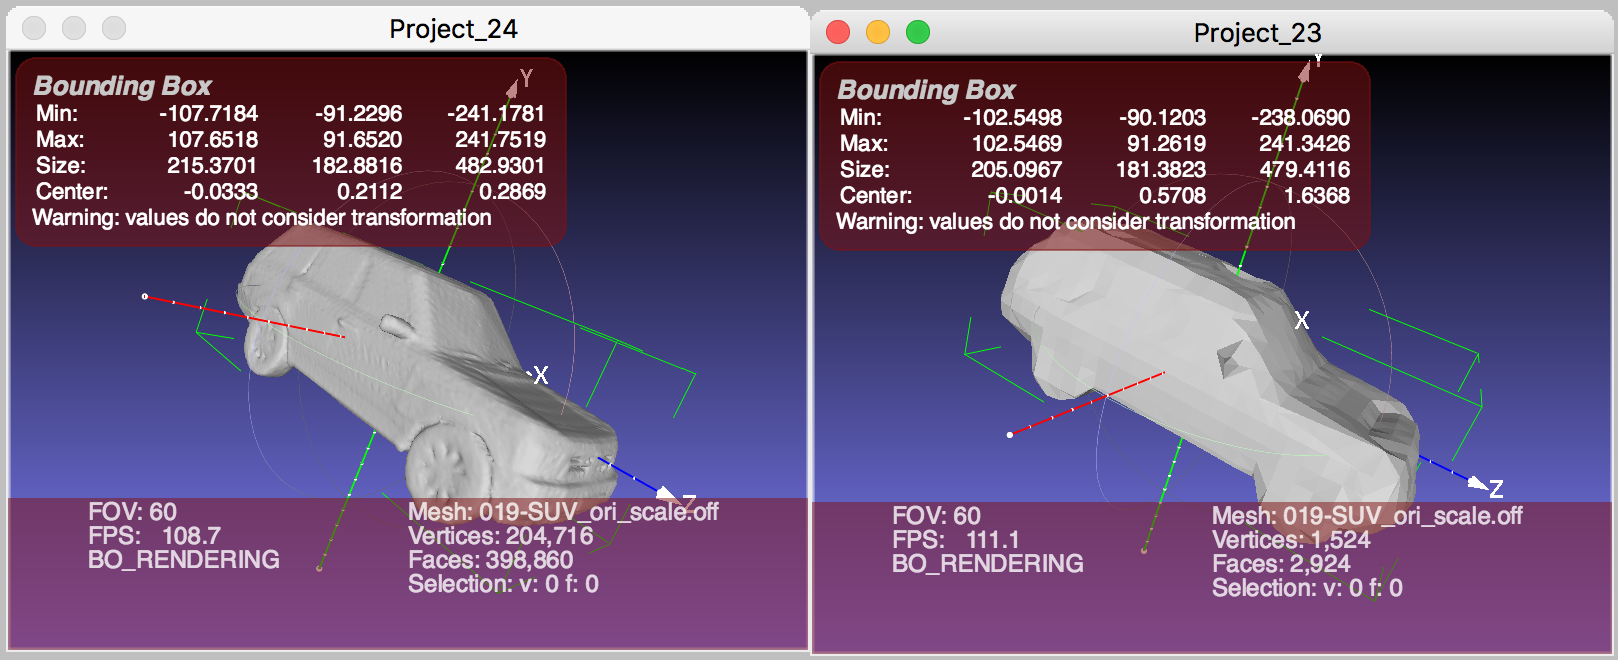